# plot_flights.ipynb

In [12]:
import pandas as pd
import plotly.express as px

# GET DATA

In [13]:
df_beetles = pd.read_csv('beetles.csv')
df_observations = pd.read_csv('observations.csv')

In [14]:
# Merge tables using ID as key

df_merged = df_beetles.merge(df_observations)

# Drop all columns which do not contain data
df_merged.dropna(axis='columns', how='all', inplace=True)

In [15]:
# Select rows where obs contains 'F' (flew) or 'N' (did not fly)
df_merged = df_merged.query("obs.str.contains('F') | obs.str.contains('N')")

# Create a new column 'flew'
df_merged['flew'] = df_merged.obs.str.contains('F')

df_merged

,ID,Group,Sex,date treated,date dead,Notes,date,obs,flew
0,1,A,F,2023-03-06,2023-04-10,NaN,2023-02-28,N,False
1,1,A,F,2023-03-06,2023-04-10,NaN,2023-03-01,N,False
2,1,A,F,2023-03-06,2023-04-10,NaN,2023-03-02,F,True
3,1,A,F,2023-03-06,2023-04-10,NaN,2023-03-03,F,True
5,1,A,F,2023-03-06,2023-04-10,NaN,2023-03-05,N,False
...,...,...,...,...,...,...,...,...,...
4940,115,D,F,2023-03-06,NaN,NaN,2023-04-07,N,False
4941,115,D,F,2023-03-06,NaN,NaN,2023-04-08,N,False
4942,115,D,F,2023-03-06,NaN,NaN,2023-04-09,N,False
4943,115,D,F,2023-03-06,NaN,NaN,2023-04-10,N,False


In [16]:
# Create a new dataframe containing only the columns we need

df = df_merged[['Group','date','flew']]
df

,Group,date,flew
0,A,2023-02-28,False
1,A,2023-03-01,False
2,A,2023-03-02,True
3,A,2023-03-03,True
5,A,2023-03-05,False
...,...,...,...
4940,D,2023-04-07,False
4941,D,2023-04-08,False
4942,D,2023-04-09,False
4943,D,2023-04-10,False


In [17]:
def proportion_flew(df):
    """ returns proportion of beetles which flew """
    return df.flew.sum() / df.flew.count()

# proportion_flew(df)

In [18]:
# calculate proportion of beetles which flew for each 'Group' and 'date'
gb = df.groupby(['Group','date']).apply(proportion_flew)
gb

Group  date      
A      2023-02-28    0.035714
       2023-03-01    0.035714
       2023-03-02    1.000000
       2023-03-03    0.785714
       2023-03-05    0.107143
                       ...   
D      2023-04-07    0.000000
       2023-04-08    0.000000
       2023-04-09    0.000000
       2023-04-10    0.000000
       2023-04-11    0.000000
Length: 163, dtype: float64

# PLOT

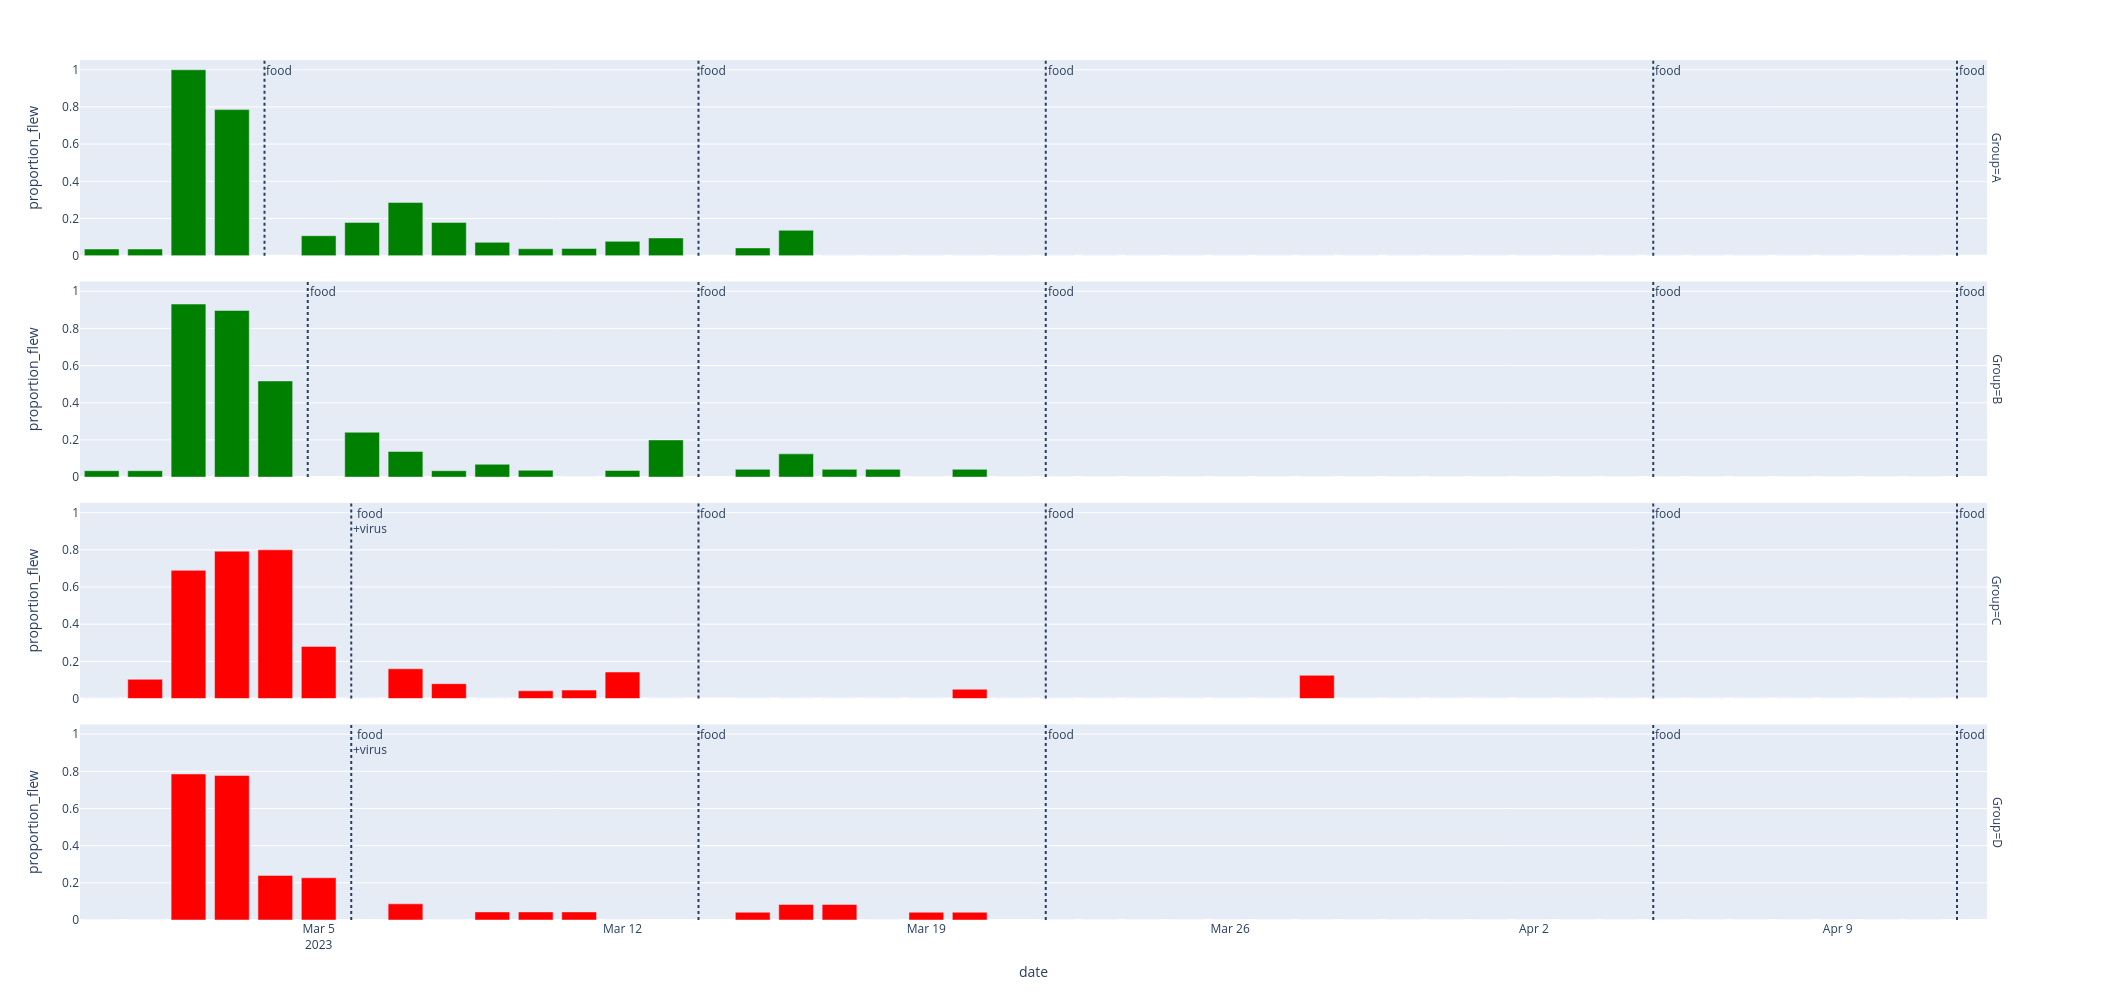

In [20]:
df = gb.reset_index().rename(columns={0:'proportion_flew'})
fig = px.bar(df, x='date', y='proportion_flew', facet_row='Group', color='Group', color_discrete_sequence=['green','green','red','red'])

fig.update_layout(showlegend=False, width=1000, height=1000)

fig.add_vline(x=pd.to_datetime('2023-03-05 08').timestamp()*1000, line_dash="dot", row=1, col=1, annotation_text="food<br>+virus", annotation_position="top right")
fig.add_vline(x=pd.to_datetime('2023-03-05 08').timestamp()*1000, line_dash="dot", row=2, col=1, annotation_text="food<br>+virus", annotation_position="top right")
fig.add_vline(x=pd.to_datetime('2023-03-04 08').timestamp()*1000, line_dash="dot", row=3, col=1, annotation_text="food", annotation_position="top right")
fig.add_vline(x=pd.to_datetime('2023-03-03 08').timestamp()*1000, line_dash="dot", row=4, col=1, annotation_text="food", annotation_position="top right")

fig.add_vline(x=pd.to_datetime('2023-03-13 08').timestamp()*1000, line_dash="dot", row="all", col=1, annotation_text="food", annotation_position="top right")
fig.add_vline(x=pd.to_datetime('2023-03-21 08').timestamp()*1000, line_dash="dot", row="all", col=1, annotation_text="food", annotation_position="top right")
fig.add_vline(x=pd.to_datetime('2023-04-04 08').timestamp()*1000, line_dash="dot", row="all", col=1, annotation_text="food", annotation_position="top right")
fig.add_vline(x=pd.to_datetime('2023-04-11 08').timestamp()*1000, line_dash="dot", row="all", col=1, annotation_text="food", annotation_position="top right")
   
fig.write_html("results-plot.html")
fig.write_image("results-plot.png")

fig.show()